# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# upload data to colab
from google.colab import files
uploaded=files.upload()

import pandas as pd
import re

# Read the DataFrame
df = pd.read_csv("reviews.csv")

# Calculate N-grams
def calculate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

# Calculate probabilities for bigrams
def calculate_bigram_probabilities(text):
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_counts = {}
    for bigram in bigrams:
        bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        numerator = count
        denominator = sum(value for key, value in bigram_counts.items() if key[0] == bigram[1])
        if denominator != 0:
            bigram_probabilities[bigram] = numerator / denominator
        else:
            bigram_probabilities[bigram] = 0.0  # Handle division by zero gracefully

    return bigram_probabilities

# Extract noun phrases from a given text using regex
def extract_noun_phrases(text):
    noun_phrases = re.findall(r'\b(?:a|an|the)? ?(\w+(?: \w+)*?) (?:is|was|are|were) (?:a|an|the)? ?\w+(?: \w+)*?\b', text)
    return noun_phrases

# Calculate relative probabilities of noun phrases
def calculate_relative_probabilities(reviews):
    all_noun_phrases = set()
    review_noun_phrases = {}

    # Extract noun phrases from each review and update all_noun_phrases
    for i, text in enumerate(reviews):
        noun_phrases = extract_noun_phrases(text)
        all_noun_phrases.update(noun_phrases)
        review_noun_phrases[i] = noun_phrases

    # Calculate frequency of each noun phrase across all reviews
    phrase_frequency = {phrase: sum(1 for review_phrases in review_noun_phrases.values() if phrase in review_phrases) for phrase in all_noun_phrases}

    # Calculate max frequency of noun phrases across all reviews
    max_frequency = max(phrase_frequency.values()) if phrase_frequency else 1

    # Calculate relative probabilities
    relative_probabilities = {i: {phrase: phrase_frequency[phrase] / max_frequency for phrase in review_phrases} for i, review_phrases in review_noun_phrases.items()}

    return relative_probabilities

# Example usage
reviews = df['Reviews'].tolist()

# Extract all noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(reviews)

# Print results
for review_index, probabilities in relative_probabilities.items():
    print("Review", review_index+1, ":")
    for phrase, probability in probabilities.items():
        print(phrase, ":", probability)

# Calculate and print bigram probabilities
for i, review in enumerate(reviews):
    print("Bigram Probabilities for Review", i+1)
    bigram_probabilities = calculate_bigram_probabilities(review)
    for bigram, probability in bigram_probabilities.items():
        print(bigram, ":", probability)


Streaming output truncated to the last 5000 lines.
('and', "there's") : 1.0
("there's", 'a') : 0.3333333333333333
('a', 'small') : 1.0
('small', 'space') : 1.0
('space', 'between') : 0.5
('between', 'the') : 0.07692307692307693
('the', 'numbers,') : 1.0
('numbers,', 'and') : 0.09090909090909091
('and', 'no') : 0.3333333333333333
('no', 'dashes') : 1.0
('dashes', 'for') : 0.14285714285714285
('for', 'the') : 0.07692307692307693
('the', 'in') : 1.0
('in', 'between') : 0.5
('between', 'days,') : 1.0
('days,', 'so') : 0.2
('so', 'when') : 1.0
('when', 'I') : 0.07142857142857142
('I', 'try') : 1.0
('try', 'checking') : 1.0
('checking', 'the') : 0.07692307692307693
('the', 'day,') : 1.0
('day,', 'I') : 0.07142857142857142
('I', 'just') : 1.0
('just', 'have') : 0.25
('have', 'to') : 0.14285714285714285
('to', 'estimate.') : 1.0
('estimate.', 'Like') : 1.0
('Like', 'if') : 1.0
('if', "it's") : 0.5
("it's", 'the') : 0.07692307692307693
('the', '7th,') : 1.0
('7th,', 'on') : 0.5
('on', 'the') : 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math

# Read the CSV file
def read_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        reviews = [line.strip() for line in lines]
    return reviews

# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# term frequency (TF) for a document
def calculate_tf(document):
    tf = {}
    total_terms = len(document)
    for term in document:
        tf[term] = tf.get(term, 0) + 1 / total_terms
    return tf

# inverse document frequency (IDF) for terms
def calculate_idf(documents):
    idf = {}
    total_documents = len(documents)
    all_terms = set([term for document in documents for term in document])
    for term in all_terms:
        document_count = sum(1 for document in documents if term in document)
        idf[term] = math.log(total_documents / (document_count + 1))
    return idf

# TF-IDF weights for each term-document pair
def calculate_tfidf(documents, idf):
    tfidf_matrix = []
    for document in documents:
        tfidf_vector = {}
        tf = calculate_tf(document)
        for term, frequency in tf.items():
            tfidf_vector[term] = frequency * idf[term]
        tfidf_matrix.append(tfidf_vector)
    return tfidf_matrix

# cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1.get(term, 0) * vector2.get(term, 0) for term in set(vector1) | set(vector2))
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Handle division by zero
    return dot_product / (magnitude1 * magnitude2)

# Main function
def main():
    # Read reviews from CSV
    reviews = read_csv("reviews.csv")

    # Define a sample query
    query = "The quality of the item is great"

    # Preprocess documents and query
    preprocessed_documents = [preprocess_text(review) for review in reviews]
    preprocessed_query = preprocess_text(query)

    # Calculate IDF
    idf = calculate_idf(preprocessed_documents)

    # Calculate TF-IDF matrix
    tfidf_matrix = calculate_tfidf(preprocessed_documents, idf)

    # Calculate TF-IDF representation for the query
    query_tfidf = {}
    query_tf = calculate_tf(preprocessed_query)
    for term, frequency in query_tf.items():
        query_tfidf[term] = frequency * idf.get(term, 0)

    # Calculate cosine similarity between query and documents
    cosine_similarities = []
    for document_tfidf in tfidf_matrix:
        similarity = cosine_similarity(query_tfidf, document_tfidf)
        cosine_similarities.append(similarity)

    # Rank documents based on cosine similarity
    ranked_documents = sorted(zip(reviews, cosine_similarities), key=lambda x: x[1], reverse=True)

    # Print ranked documents
    for rank, (document, similarity) in enumerate(ranked_documents, start=1):
        print(f"Rank {rank}: {document} (Cosine Similarity: {similarity})")

if __name__ == "__main__":
    main()


Rank 1: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 2: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 3: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 4: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 5: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 6: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 7: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 8: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 9: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 10: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 11: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 12: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 13: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 14: "The quality of the item is great (Cosine Similarity: 1.0)
Rank 15: "The quality of the item is great (Cosine Simila

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


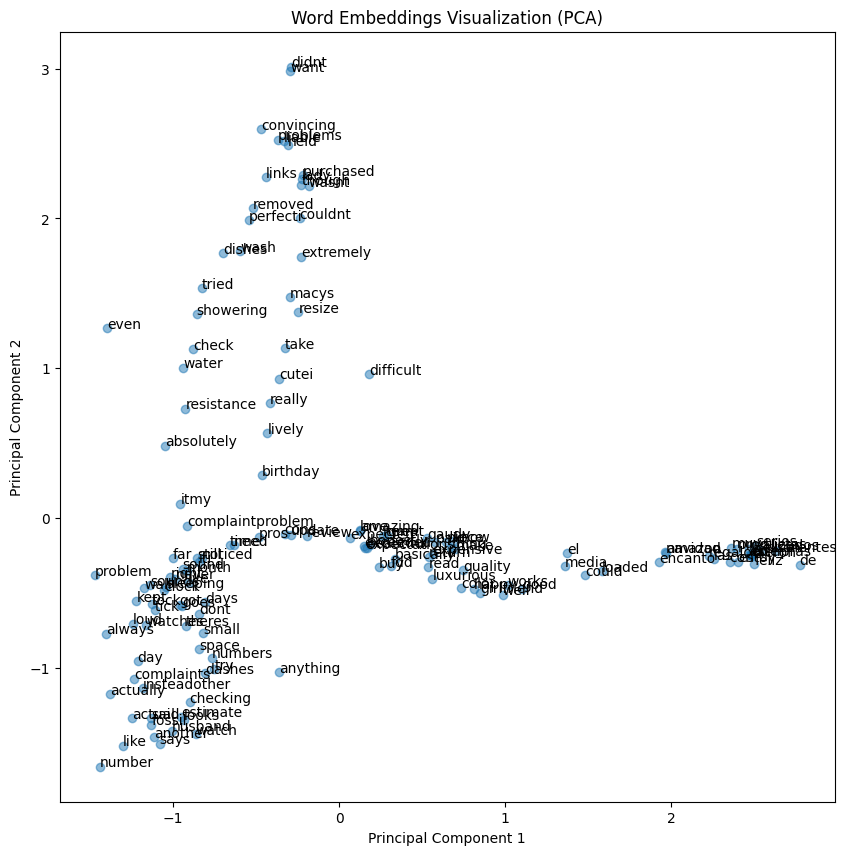

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv("reviews.csv")

# Extract review text
reviews = df['Reviews'].tolist()

# Text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    return tokens

# Tokenize and preprocess the reviews
tokenized_reviews = [preprocess_text(review) for review in reviews]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Visualize Word Embeddings
def plot_word_embeddings(model):
    vocab = list(model.wv.index_to_key)
    X = model.wv[vocab]

    # Reduce dimensionality with PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embeddings Visualization (PCA)')
    plt.show()

# Plot word embeddings
plot_word_embeddings(model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/VishwanaGopalapuram/vishwana-exercise/blob/main/annotated_reviews%20(1).csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# The task encompassed a range of subjects and methodologies in the field of natural language processing (NLP), presenting both difficulties and pleasures. The task encompassed N-gram analysis, TF-IDF computation, document representation, establishment of a word embedding model, and the development of a sentiment analysis dataset. Starting from scratch, the job was to write code that would count the frequency of N-grams, figure out bigram probabilities, extract noun phrases, and figure out how likely each one was to happen. The work also included the calculation of TF-IDF and the building of a document-term matrix, which provided good opportunities for learning. The challenge additionally entailed developing a word embedding model using the dataset, necessitating the use of trial and error. In order to complete the challenge, a sentiment analysis dataset had to be created, which required attentive reading and comprehension of the material. Though I learned a lot from the project, I think it would be better to use pre-existing libraries and frameworks to make things more efficient and reliable in the real world.